In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [9]:
# Parameters
S = 165
K = 165
r = 5.25 / 100
q = 0.53 / 100
curr_date = np.datetime64('2023-03-03')
exp_date = np.datetime64('2023-03-17')

# Time to maturity
ttm = (exp_date - curr_date).astype('timedelta64[D]').astype(int) / 365.0
print(ttm)

volatilities = np.arange(0.1, 0.8, 0.01)

# Black-Scholes model
def black_scholes_call_put(S, K, ttm, r, q, sigma):
    d1 = (np.log(S / K) + (r - q + 0.5 * sigma**2) * ttm) / (sigma * np.sqrt(ttm))
    d2 = d1 - sigma * np.sqrt(ttm)

    call = S * np.exp(-q * ttm) * norm.cdf(d1) - K * np.exp(-r * ttm) * norm.cdf(d2)
    put = K * np.exp(-r * ttm) * norm.cdf(-d2) - S * np.exp(-q * ttm) * norm.cdf(-d1)
    
    return call, put

0.038356164383561646


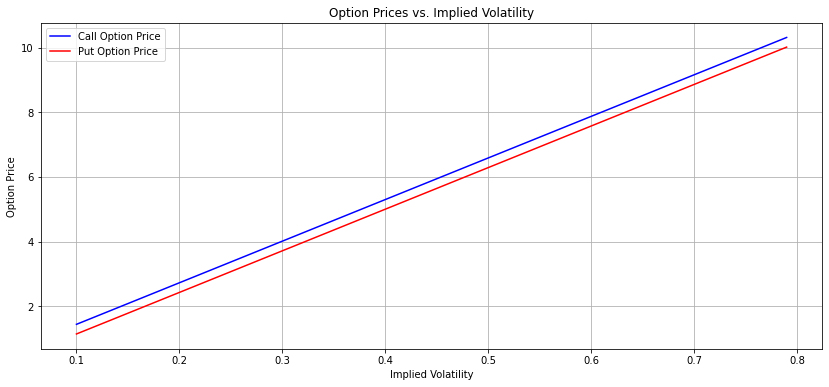

In [10]:
call_prices = []
put_prices = []

for sigma in volatilities:
    call, put = black_scholes_call_put(S, K, ttm, r, q, sigma)
    call_prices.append(call)
    put_prices.append(put)

plt.figure(figsize=(14, 6))
plt.plot(volatilities, call_prices, label='Call Option Price', color='blue')
plt.plot(volatilities, put_prices, label='Put Option Price', color='red')
plt.xlabel('Implied Volatility')
plt.ylabel('Option Price')
plt.title('Option Prices vs. Implied Volatility')
plt.legend()
plt.grid(True)
plt.show()
